# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'lightgbm'

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [4]:
data = pd.read_csv('./train.csv')#./train.csv

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
#посмотрим на наши данные
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5120,65,99.10,6496.15,Male,1,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0
1409,67,43.90,3097.2,Male,0,No,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,Two year,No,Electronic check,0
4812,70,111.15,7737.55,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Mailed check,0
4689,32,35.15,1051.05,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
2454,4,48.55,201,Male,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1


In [7]:
#проверим есть ли пропукски
data.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

*В данных пропусков не наблюдается, НО они могут также быть представлены различными символами*

 <p style="border:2px black solid; padding:10px">Проверим есть ли пропуски в виде пробелов</p>

In [8]:
data.where(data == ' ').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              0 non-null      float64
 1   MonthlySpending           0 non-null      float64
 2   TotalSpent                9 non-null      object 
 3   Sex                       0 non-null      object 
 4   IsSeniorCitizen           0 non-null      float64
 5   HasPartner                0 non-null      object 
 6   HasChild                  0 non-null      object 
 7   HasPhoneService           0 non-null      object 
 8   HasMultiplePhoneNumbers   0 non-null      object 
 9   HasInternetService        0 non-null      object 
 10  HasOnlineSecurityService  0 non-null      object 
 11  HasOnlineBackup           0 non-null      object 
 12  HasDeviceProtection       0 non-null      object 
 13  HasTechSupportAccess      0 non-null      object 
 14  HasOnlin

In [9]:
#выведем часть с пропусками
data.loc[data.TotalSpent == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


*Видим 9 пустых строк*

In [10]:
#удалим их
data.drop(index = list(data.loc[data.TotalSpent == ' '].index), inplace=True)

In [11]:
#обновим индексы
data = data.reset_index(drop=True)

In [12]:
#проверим
' ' in data.values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5273 entries, 0 to 5272
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   object 
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

*Избавились от пропусков*

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

**1**

In [13]:
#посмотрим на численные признаки
data.loc[:, num_cols]

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.2
2,1,75.90,75.9
3,32,79.30,2570
4,60,115.25,6758.45
...,...,...,...
5268,3,30.40,82.15
5269,50,44.45,2188.45
5270,1,55.05,55.05
5271,29,76.00,2215.25


 <p style="border:2px black solid; padding:10px">Построим для каждого признака гистограмму</p>

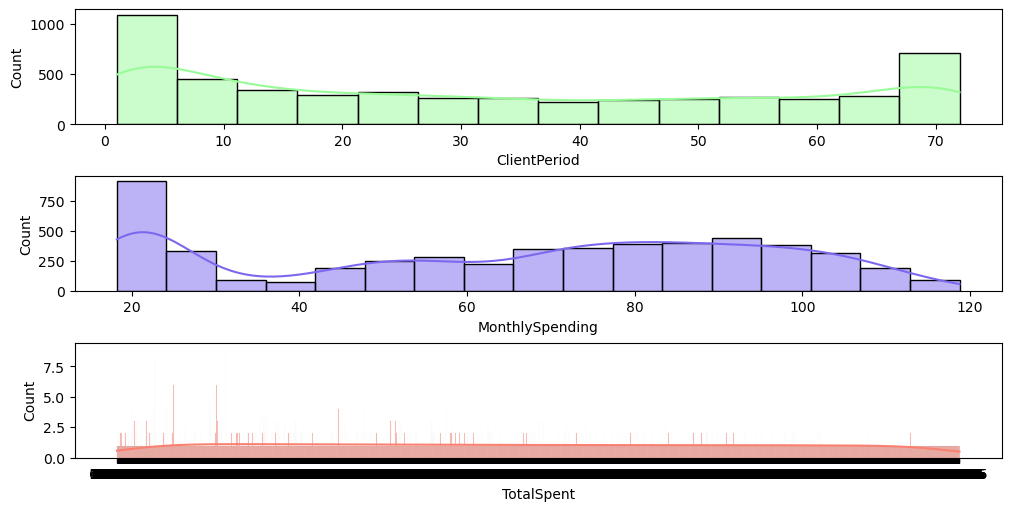

In [14]:
#числовые переменные
fig, axes = plt.subplots(3, 1, figsize=(10, 5), constrained_layout=True)
sns.histplot(ax=axes[0], x=data[num_cols[0]], kde=True, color='palegreen')
sns.histplot(ax=axes[1],  x=data[num_cols[1]], kde=True,  color='mediumslateblue')
sns.histplot(ax=axes[2], x=data[num_cols[2]],kde=True, color='salmon');

In [15]:
#выведем категориальные признаки
data.loc[:, cat_cols]

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5269,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5270,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5271,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


 <p style="border:2px black solid; padding:10px">Выведем количество уникальных значений для каждого признака</p>

In [16]:
for i in cat_cols:
    print(data[i].value_counts(), end='\n\n')

Sex
Male      2651
Female    2622
Name: count, dtype: int64

IsSeniorCitizen
0    4431
1     842
Name: count, dtype: int64

HasPartner
No     2704
Yes    2569
Name: count, dtype: int64

HasChild
No     3676
Yes    1597
Name: count, dtype: int64

HasPhoneService
Yes    4754
No      519
Name: count, dtype: int64

HasMultiplePhoneNumbers
No                  2508
Yes                 2246
No phone service     519
Name: count, dtype: int64

HasInternetService
Fiber optic    2341
DSL            1795
No             1137
Name: count, dtype: int64

HasOnlineSecurityService
No                     2611
Yes                    1525
No internet service    1137
Name: count, dtype: int64

HasOnlineBackup
No                     2331
Yes                    1805
No internet service    1137
Name: count, dtype: int64

HasDeviceProtection
No                     2316
Yes                    1820
No internet service    1137
Name: count, dtype: int64

HasTechSupportAccess
No                     2603
Yes         

 <p style="border:2px black solid; padding:10px">Построим диаграммы для каждого признака</p>

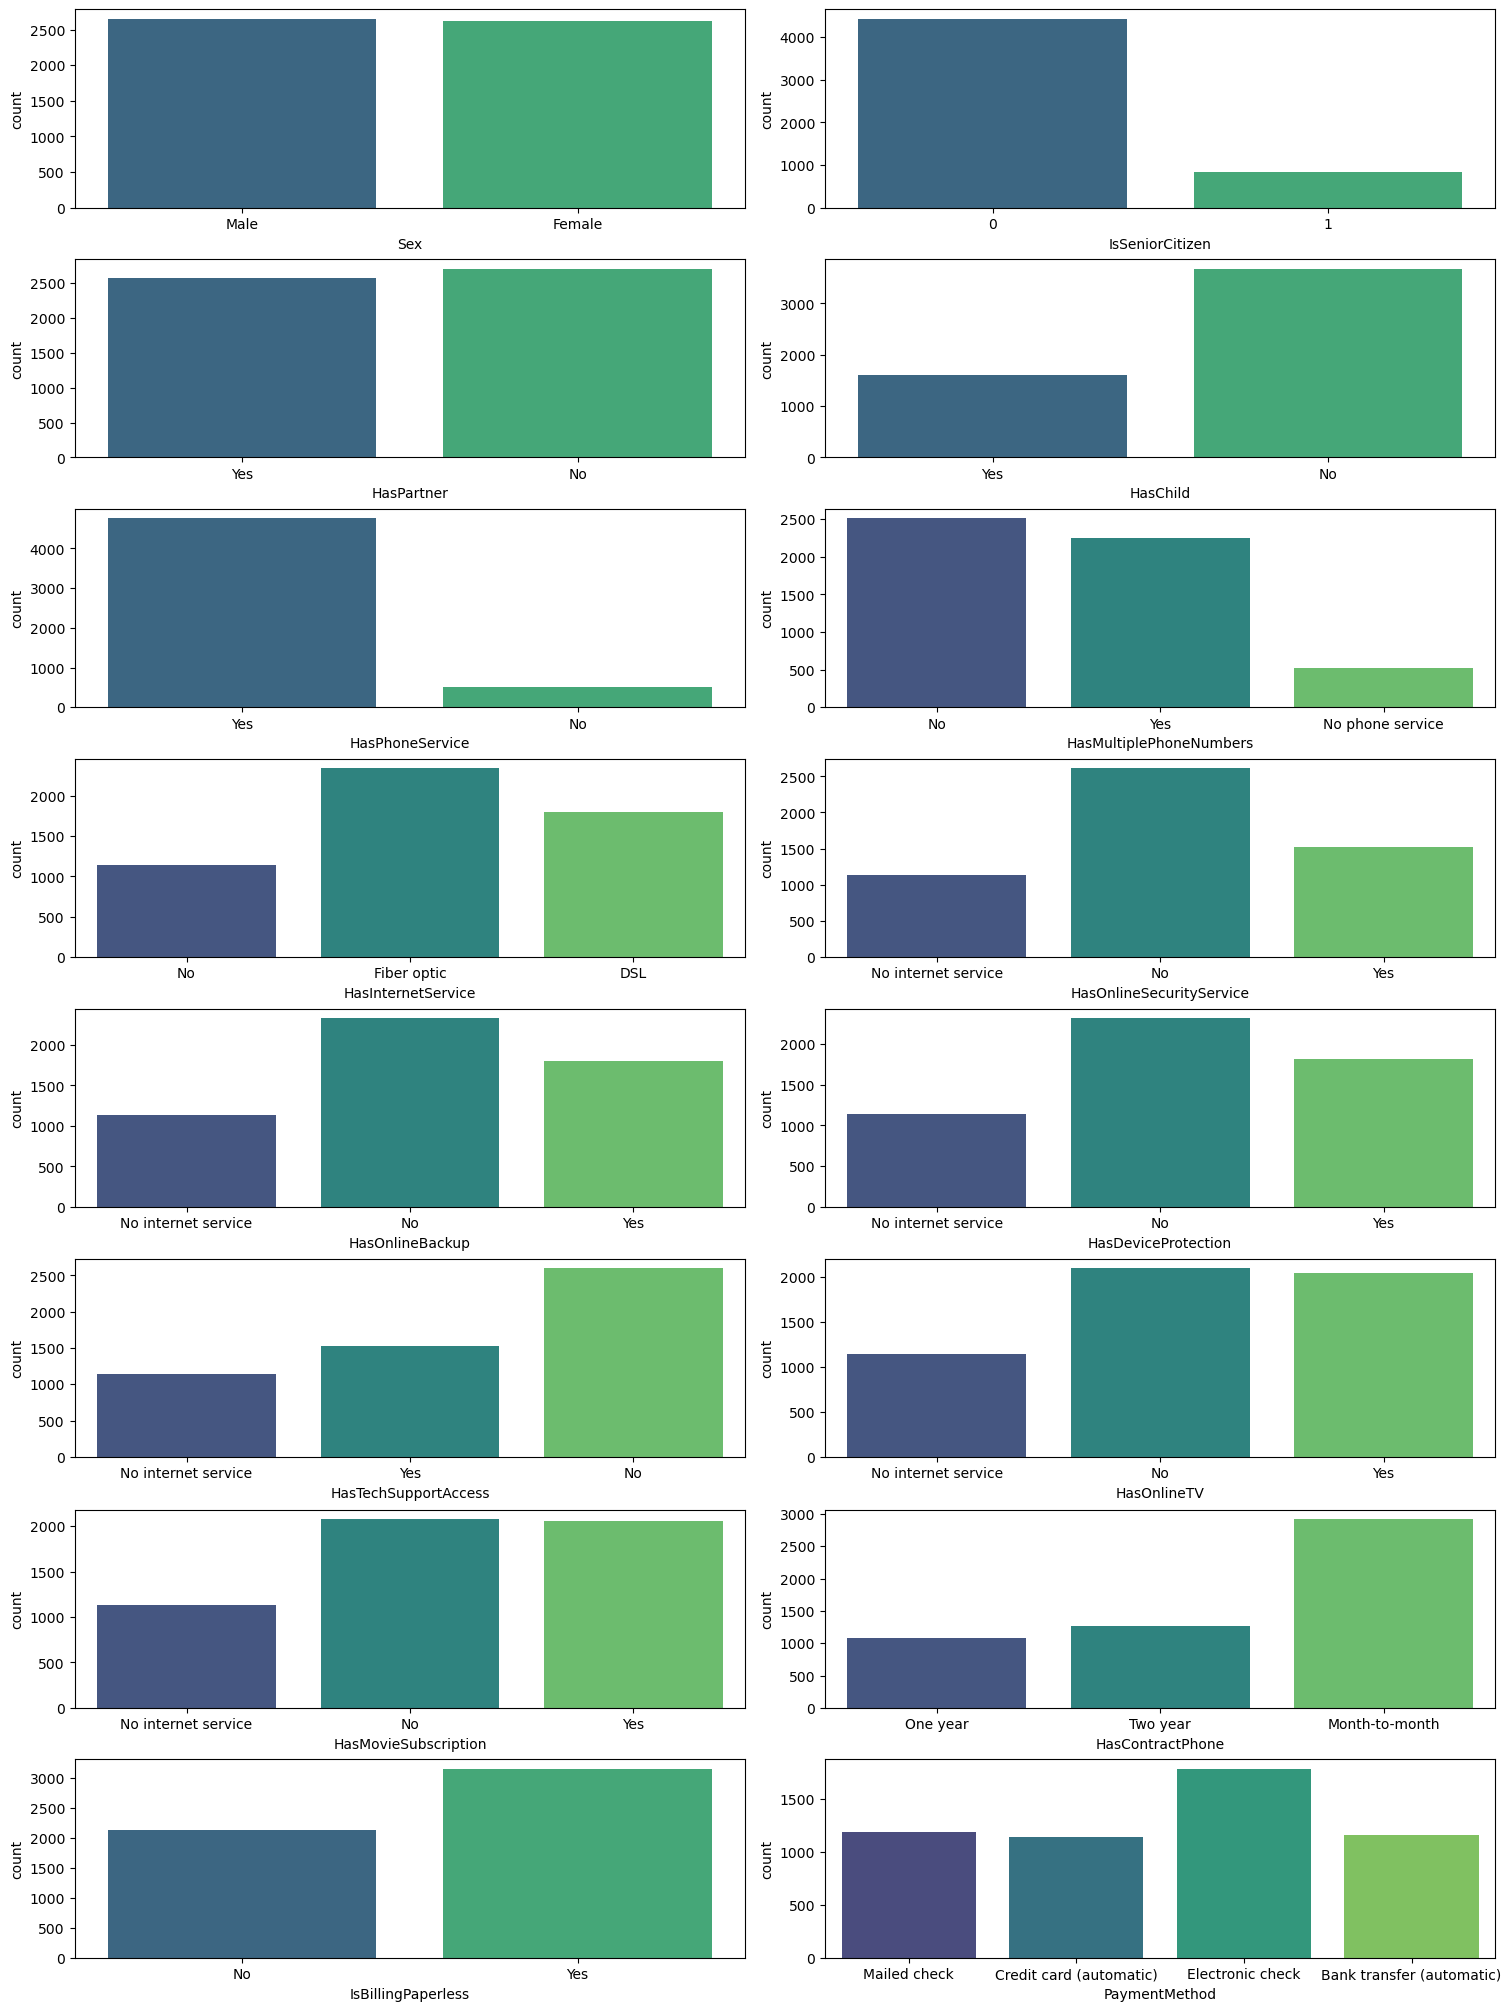

In [17]:
#числовые переменные
fig, axes = plt.subplots(8, 2, figsize=(15, 20), constrained_layout=True)
i = 0
for  raw in list(range(8)):
    for column in range(2):
        sns.countplot(ax=axes[raw][column], x=data[cat_cols[i]], palette= 'viridis' )
        i += 1


**2**

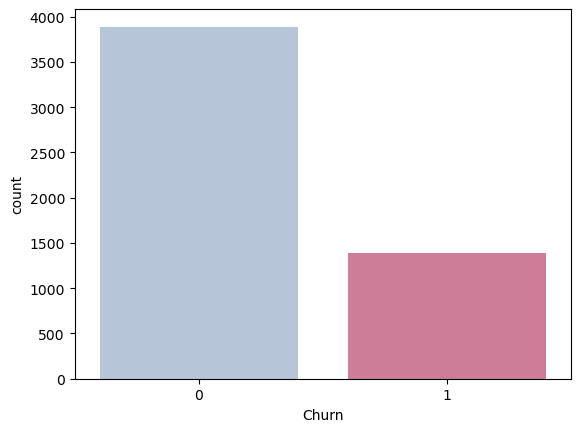

In [18]:
#распределение  целевой переменной
sns.countplot(x = data[target_col], palette=['lightsteelblue', 'palevioletred']);

*Наблюдается дисбаланс классов*

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [19]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics  import roc_auc_score
from sklearn.pipeline import make_pipeline

**1**

 <p style="border:2px black solid; padding:10px">Закодируем категориальные признаки</p>

In [20]:
#создадим объект ohe
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [21]:
#обучим и переведем в датасет
train_cat = pd.DataFrame(encoder.fit_transform(data.loc[:, cat_cols]), columns=encoder.get_feature_names_out())

In [22]:
#выведем
train_cat.head()

,Sex_Male,IsSeniorCitizen_1,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No internet service,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


 <p style="border:2px black solid; padding:10px">Нормализуем числовые признаки</p>

In [23]:
#создадим объект standardscaler
scaler = StandardScaler()

In [24]:
#обучим и переведем в датасет
train_num = pd.DataFrame(scaler.fit_transform(data.loc[:, num_cols]), columns=num_cols)

In [25]:
#проверим
train_num.head()

,ClientPeriod,MonthlySpending,TotalSpent
0,0.919099,-1.506436,-0.557582
1,1.612060,-1.295997,-0.184763
2,-1.282072,0.362658,-0.976504
3,-0.018437,0.475334,0.122800
4,1.122911,1.666716,1.968909


In [26]:
#объединим датасеты 
X = pd.concat([train_cat, train_num], axis=1)

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5273 entries, 0 to 5272
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Sex_Male                                      5273 non-null   float64
 1   IsSeniorCitizen_1                             5273 non-null   float64
 2   HasPartner_Yes                                5273 non-null   float64
 3   HasChild_Yes                                  5273 non-null   float64
 4   HasPhoneService_Yes                           5273 non-null   float64
 5   HasMultiplePhoneNumbers_No phone service      5273 non-null   float64
 6   HasMultiplePhoneNumbers_Yes                   5273 non-null   float64
 7   HasInternetService_Fiber optic                5273 non-null   float64
 8   HasInternetService_No                         5273 non-null   float64
 9   HasOnlineSecurityService_No internet service  5273 non-null   f

In [27]:
#сохраним отдельно целевую переменную
y = data[target_col]

**2**

In [28]:
#создадим объект логистической регрессии
log_reg = LogisticRegression()

In [29]:
#зададим параметры
param = {'C' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

In [30]:
#создадим объект gridsearch
grid_search = GridSearchCV(log_reg, param_grid=param, cv=5, scoring='roc_auc')

In [31]:
#обучим 
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='roc_auc')

In [32]:
#посмотрим оптимальное значение С
grid_search.best_params_

{'C': 10.0}

In [33]:
#выведем наилучший результат
grid_search.best_score_

0.8448199875031227

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

*При С = 100 мы получили качество равное 0.846*

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

**1**

In [34]:
#разделим выборку
X_train,X_val,  y_train, y_val = train_test_split(data.iloc[:,:-1], data.Churn, test_size=0.33, random_state=42)

In [35]:
#создадим объект модели
cat = CatBoostClassifier(random_state=42, scale_pos_weight = 2.8)

In [36]:
#обучим
cat.fit(X_train, y_train,cat_features=cat_cols,
          verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [37]:
#оценим на валидационной
roc_auc_score(y_val, cat.predict_proba(X_val)[:,1])

0.8385753019894971

**2**

 <p style="border:2px black solid; padding:10px">Перебор параметров</p>

In [38]:
#проверим качество модели при различных комбинациях lr и n_estimators
prm = []
for i in [0.5, 0.4, 0.2, .01, 0.001, 0.0001, 0.00001]:
    for j in range(50, 250, 5):
        cat_prm = CatBoostClassifier(scale_pos_weight = 2.8, n_estimators=j, learning_rate=i, random_state=42, verbose=False)
        cat_prm.fit(X_train, y_train, cat_features=cat_cols)
        rocauc_train = roc_auc_score\
        (y_train, cat_prm.predict_proba(X_train)[:,1])
        rocauc_val = roc_auc_score\
        (y_val, cat_prm.predict_proba(X_val)[:,1])
        prm.append([i,j, rocauc_train, rocauc_val])
prm_DataFrame = pd.DataFrame\
(prm, columns=['lr','n_estimators', 'rocauc_train', 'rocauc_val'])

In [39]:
#выведем наилучший результат на валидационных данных
prm_DataFrame.sort_values(by='rocauc_val', ascending=False)[:1]

,lr,n_estimators,rocauc_train,rocauc_val
82,0.2,60,0.868571,0.843444


In [40]:
#итоговая модель
cat_final = CatBoostClassifier(
n_estimators=60, learning_rate=0.2, cat_features=cat_cols,
                               random_state=42, verbose=False)

In [41]:
#обучим
cat_final.fit(X_train, y_train)

In [42]:
#оценим
roc_auc_score(y_val, cat_final.predict_proba(X_val)[:,1])

0.8425464124607516

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

Модель показывает наилучший результат(качество 0.84), когда количество деревьев равно 60 при шаге  0.2. 

# Предсказания

In [43]:
best_model = cat_final

In [44]:
X_test = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/test.csv')
submission = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/advanced-dls-spring-2021/test.csv'